# Exploratory Data Analysis and Visualizations

**1. Distribution of Key Metrics**

  A. Distribution of Daily Active Users (DAU)
  *   Helps identify how widely games vary in user enegagement.
  *   A highly skewed distribution may indicate a few blockbuster titles dominating attention.
  *   Useful for developers assessing engagement benchmarks.

**Key Takeaways from the Plot:**

1. DAU is evenly spread between ~20,000 to 200,000
    *   There's no extreme skew to low or high DAU values.
    *   The dataset seems baanced across games with small, medium and large audiences.

2. A visibile peak between ~120,000 to ~160,000 DAU
    *   This range has the highest concentration of games.
    *   It may represent the 'sweet spot' for popular games that retain user bases.

3. Another minor bump in the lower range(under ~50,000 DAU)
    *   Indicates a group of smaller or niche games with smaller followings.

4. No extreme outliers
    *   The distribution doesn't have any heavy tail or single outliers dominating the count.


For Feature Binning: 
- This plot helps pick cutoffs, to classify games as low, medium, or high DAU for modeling.

For Stakeholder Insights:

- Product teams can target mid-tier DAU games for growth strategies.

- Marketers may focus on high DAU games for conversion campaigns.

In [10]:
# Import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# Load Processed Data

df = pd.read_csv("data/scaled_data_20250520_230548.csv")

In [18]:
# Describe the Imported Data

df.head()
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4989 entries, 0 to 4988
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   date                             4989 non-null   object 
 1   platform                         4989 non-null   object 
 2   daily_active_users_dau           4989 non-null   int64  
 3   new_registrations                4989 non-null   int64  
 4   session_duration_minutes         4989 non-null   float64
 5   ingame_purchases_                4989 non-null   float64
 6   social_media_mentions            4989 non-null   int64  
 7   stream_viewership                4989 non-null   float64
 8   revenue_                         4989 non-null   float64
 9   top_genre                        4989 non-null   object 
 10  influencer_endorsements          4989 non-null   int64  
 11  revenue_per_user                 4989 non-null   float64
 12  log_revenue_per_user

,daily_active_users_dau,new_registrations,session_duration_minutes,ingame_purchases_,social_media_mentions,stream_viewership,revenue_,influencer_endorsements,revenue_per_user,log_revenue_per_user,log_revenue,scaled_daily_active_users_dau,scaled_session_duration_minutes,scaled_ingame_purchases_,scaled_revenue_per_user,scaled_log_revenue,scaled_social_media_mentions,scaled_stream_viewership,scaled_new_registrations
count,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000,4989.000000
mean,111071.252957,11106.669072,58.349332,52079.754650,5727.306875,59989.377645,70411.817171,0.416717,1.052323,0.583343,10.920957,0.532192,0.546127,0.467731,0.073507,0.706555,0.525262,0.434788,0.532210
std,51825.934921,5182.591086,21.826225,24831.727842,2435.780271,22887.182173,41996.191553,0.493065,1.456925,0.459888,0.771552,0.272915,0.237860,0.276078,0.104459,0.226999,0.270702,0.248919,0.272912
min,10009.000000,1000.000000,8.236262,10009.847567,1001.000000,20012.244966,5010.198644,0.000000,0.027095,0.026734,8.519430,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,67896.000000,6789.000000,40.586113,31312.560583,3797.000000,40175.212242,33134.929420,0.000000,0.284336,0.250242,10.408373,0.304832,0.352545,0.236842,0.018444,0.555747,0.310736,0.219291,0.304845
50%,117520.000000,11752.000000,56.503485,50127.674771,5927.000000,59670.764554,64279.959705,0.000000,0.584716,0.460405,11.071019,0.566151,0.526011,0.446028,0.039980,0.750704,0.547455,0.431323,0.566193
75%,153186.000000,15318.000000,75.941008,72301.012982,7701.000000,79328.227960,106563.117966,1.000000,1.144246,0.762788,11.576502,0.753968,0.737839,0.692550,0.080098,0.899423,0.744610,0.645115,0.753976
max,199907.000000,19990.000000,99.997146,99954.556507,9999.000000,111958.552918,149993.898008,1.000000,13.974442,2.706345,11.918357,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


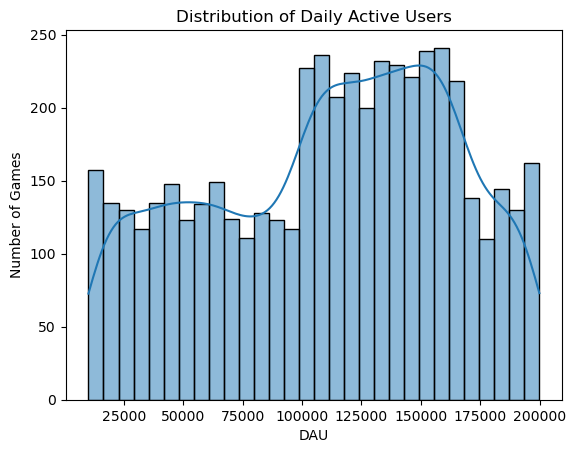

In [20]:
#plot distribution of daily active users

sns.histplot(df['daily_active_users_dau'], bins = 30, kde = True)
plt.title('Distribution of Daily Active Users')
plt.xlabel('DAU')
plt.ylabel('Number of Games')
plt.show()

**B. Distribution of Session Duration**
*   Understand how much time players typically spend in a session.
*   Useful for producy designers to benchmark session length and determine whether a game encourages repeat play or long-form experiences.


**Key Takeaways from the Plot:**

1. Most session durations are between 35 and 80 minutes

    * This is the “engagement comfort zone” for most games, long enough to be immersive, but not too long to cause fatigue.

2. The peak is around 50-55 minutes

    * That's the most common average session time across games in this dataset.
    * It's a useful benchmark for retention-focused game design.

3. A slight tail on the right toward 100 minutes

    * Fewer games have very long average sessions, these may be strategy, RPG, or immersive genres like simulation.

4. Very few games under 20 minutes

    * Suggests most popular or mainstream titles encourage extended play, not quick-fire bursts (unlike hyper-casual mobile games).

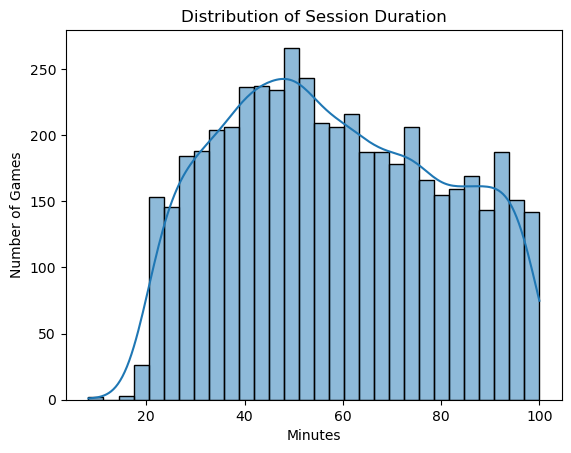

In [26]:
#plot distribution of session duration

sns.histplot(df['session_duration_minutes'], bins = 30, kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Minutes')
plt.ylabel('Number of Games')
plt.show()

**C. Log-Transformed Revenue Per User By Platform**


*   Describes monetization efficiency per user. Helps publishes understand proditability patterns.
*   Helps in identifying underperforming games with high DAU but low per-user revenue.

**Key Takeaways from the Plot:**

1. All platforms are present across the range
    * PC (blue), Console (green), Mobile (red), and VR (orange) are fairly evenly distributed.
    * No platform dominates long session durations or high revenue per user.

2. Slight distinctions
    * VR seems to have fewer data points (perhaps fewer titles), but shows a few high-RPU outliers.
    * Mobile and Console have slightly more spread above the 1.5 RPU mark.
    * PC games are well represented across the board, but don't show a strong upper edge in RPU.

3. High RPU across all platforms is rare
    * Games with >$2 per user are sparse, regardless of platform.

The plots suggests that monetization strategy, not platform alone, is the bigger differentiator.


**Insights for Stakeholders:**

  * Marketers can’t rely on platform alone for predicting per-user revenue.

  * Product Managers might explore genre or monetization design instead of targeting platform as the key variable.

  * Monetization teams should investigate titles with short sessions but high RPU—these may reveal efficient design patterns.

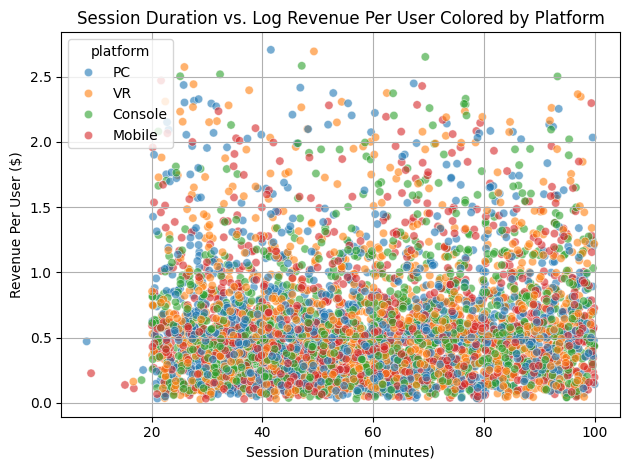

In [6]:
#scatter plot of session duration vs. log revenue user, by platform

sns.scatterplot(data=df, x='session_duration_minutes', y='log_revenue_per_user', hue='platform', alpha=0.6)
plt.title('Session Duration vs. Log Revenue Per User Colored by Platform')
plt.xlabel('Session Duration (minutes)')
plt.ylabel('Revenue Per User ($)')
plt.grid(True)
plt.tight_layout()
plt.show()

**2. Categorical Distributions**

**A. Game Count by Genre**


*   Shows popularity of genres.
*   Helps content planners and publishers in deciding where to invest next, e.g., RPGs vs. simulations.

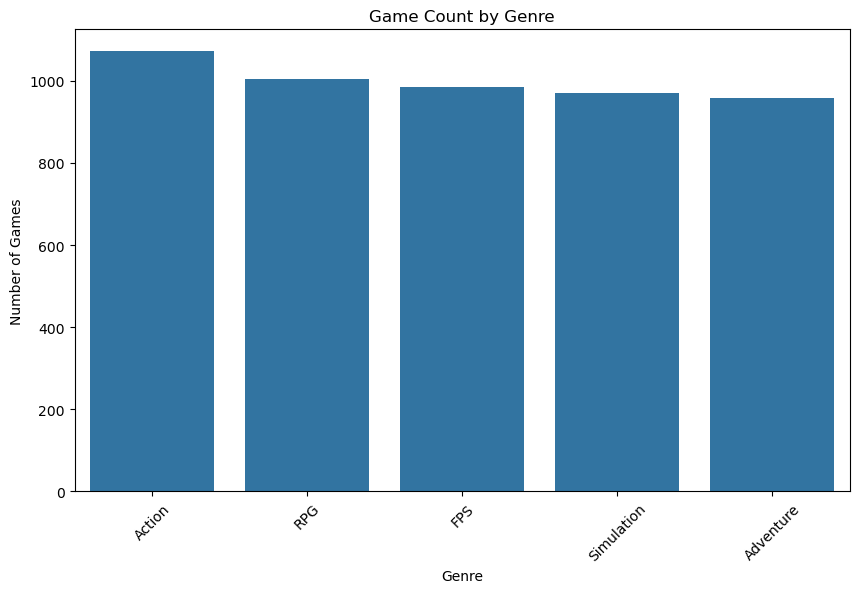

In [28]:
#plot game count by genre

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='top_genre', order=df['top_genre'].value_counts().index)
plt.title('Game Count by Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Games')
plt.xticks(rotation=45)
plt.show()

**B. Game Count by Platform**


*   Indicates market distributions
*   Helps understand where the majority of development is happening, mobile, PC or Console and informs platform specific strategy.

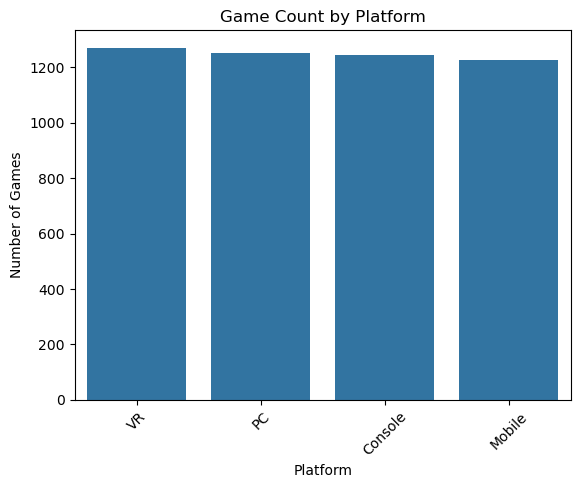

In [30]:
# plot game count by platform

sns.countplot(data=df, x='platform', order=df['platform'].value_counts().index)
plt.title('Game Count by Platform')
plt.xlabel('Platform')
plt.xticks(rotation=45)
plt.ylabel('Number of Games')
plt.show()

**C. Distribution of Engagement Level**


*   Categorizes games by how engaging they are.
*   Helps produt managers assess if most games are meeting minimum playtime expectations.

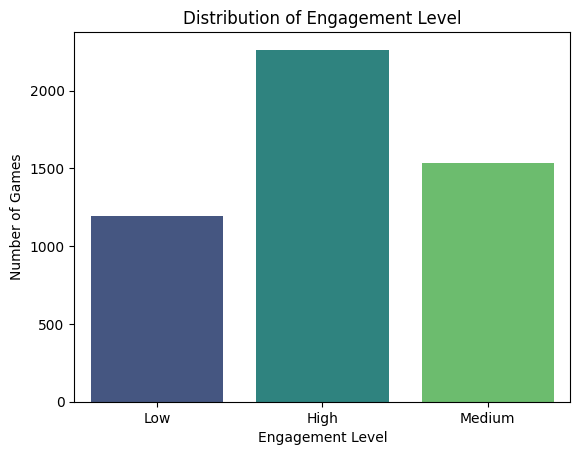

In [10]:
sns.countplot(data=df, hue='engagement_level', x='engagement_level', legend = False,  palette='viridis')
plt.title('Distribution of Engagement Level')
plt.xlabel('Engagement Level')
plt.ylabel('Number of Games')
plt.show()

**3. Feature Relationships**

**A. Log Revenue vs. DAU by Platform**


*   High DAU doesn't always translate to high revenue.
*   This plot helps developers and publishers identify which platforms are better at converting players into revenue.


**Key Takeaways from the Plot:**

1. Defined Structure:

    * The log scale reveals a more densely packed cluster of games between log revenue 9.5 - 11.5, which roughly corresponds to revenue between ~13,000 and ~100,000 DAU.

    * Most games fall in this mid-revenue bracket, which is valuable for mainstream monetization strategies.

2. Positive Relationship:

    * There's still a positive trend between DAU and log revenue, but it's less explosive due to the transformation, this makes it easier to compare games with moderate revenues.

3. Platform Spread Still Fairly Even:

    * No major clustering of any one platform in the highest log revenue zones.

    * Suggests that platform isn't the sole factor driving high revenue—other variables (genre, engagement, monetization design) likely play a role.


**Insights for Stakeholders:**

  * Product Managers: Should look beyond platform when planning revenue growth—e.g., targeting games with high DAU but low revenue for monetization tuning. Platform-specific content strategies.

  * Marketers: Can use this to identify platform-independent monetization sweet spots and optimize spend per DAU segment.

  * Analysts & Executives: Log transformation allows for more stable benchmarking across titles, reducing distraction from a few high-revenue outliers.

  * For Monetization Teams:
    * Games with lower revenue but high DAU could be optimized to improve RPU (revenue per user). This is a key opportunity segment.

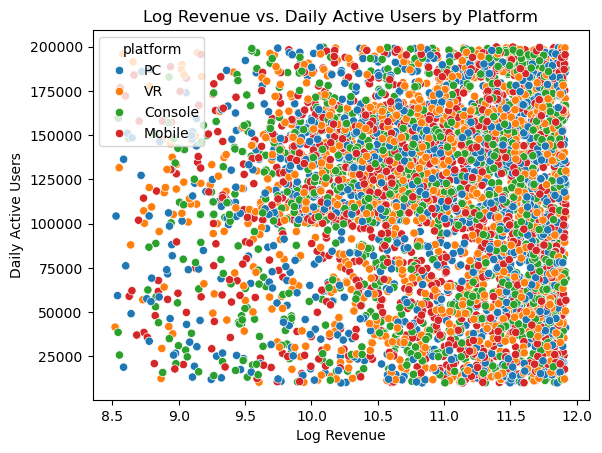

In [36]:
sns.scatterplot(data=df, x='log_revenue', y='daily_active_users_dau', hue='platform')
plt.title('Log Revenue vs. Daily Active Users by Platform')
plt.xlabel('Log Revenue')
plt.ylabel('Daily Active Users')
plt.show()

B. Revenue per User vs. Stream Viewership by Genre

*   Games with strong community visibility may monetize better.
*   This plot helps marketers with marketing and influencer campaign planning.
    * Shows which Genres benefit more from streaming exposure.


**Insights For Content & Marketing Teams:**

  * Action and RPG genres dominate total viewership, especially in Very High DAU segments.

  * These genres may benefit from influencer sponsorships, promotional campaigns, or seasonal updates to sustain attention.

**Insights For Product Managers:**

  * They can prioritize roadmap features (e.g., multiplayer, leaderboards, DLCs) for genres with higher stream consumption and larger DAU bases.

  * For genres with lower viewership but high DAU (e.g., Simulation), explore community-led features or cross-platform support.

  * For Monetization Strategy:

      * High-viewership + high-DAU genres are ripe for in-game advertising and streamer collaborations.

In [ ]:
# Create viewership bins
df['dau_bin'] = pd.cut(df['daily_active_users_dau'],
                       bins=[0, 50000, 100000, 150000, 200000],
                       labels=['Low', 'Medium', 'High', 'Very High'])

# Count how many games fall into each genre + DAU bin
genre_viewership = df.groupby(['top_genre', 'dau_bin'], observed=False)['stream_viewership'].sum().unstack().fillna(0)


genre_viewership.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='viridis')
plt.title('Total Stream Viewership by Genre and DAU Range')
plt.xlabel('Game Genre')
plt.ylabel('Total Stream Viewership')
plt.xticks(rotation=45)
plt.legend(title='DAU Range', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

**4. Influencer Endorsements and Revenue**

*   Measures the impact of influencer involvement on revenue.
*   Helps marketing teams justify the cost of influencer campaigns.

**Insights:**

  * Games with influencer endorsement (1) show a slightly higher median revenue than those without.

  * The interquartile range (IQR) is similar, but the upper half of games with endorsements seems to earn more consistently.

  * A few outliers exist in the non-endorsed group (left box), suggesting some highly successful titles did well even without influencers — likely due to strong brand, gameplay, or genre.

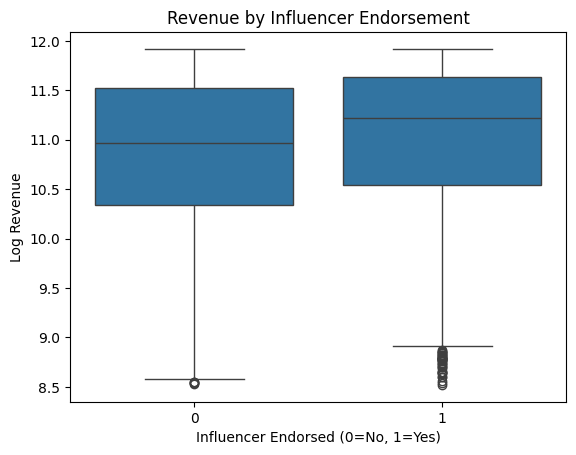

In [12]:
sns.boxplot(data=df, x='influencer_endorsements', y='log_revenue')
plt.title('Revenue by Influencer Endorsement')
plt.xlabel('Influencer Endorsed (0=No, 1=Yes)')
plt.ylabel('Log Revenue')
plt.show()

**5. Correlation Heatmap Between Scaled Features**



*   To understand which metrics are strongly correlated (e.g., DAU vs. revenue)
*   Helps in feature selection and avoiding redundant predictors.


**Key Observations from the Scaled Feature Heatmap**

Featuer Pair ------------------- Correlation ------------------------------------ Insight

```
DAU &
Revenue Per User      -0.62           Games with a large player base tends to generate lower per-user revenue.
                                      Likely using free-to-play or ad-based models.      
```
```
Revenue Per User &
Log Revenue            0.43           High revenue per user contributes directly to overall revenue, though not perfectly linearly.
```
```
Log Revenue & In-Game
Purchases              0.16           In-game monetization has some direct impact on total revenue.
```
```
New Registrations &
DAU                    1.00           Suggests that new players heavily drive daily activity. Also suggests duplicate signals, so one can be dropped for modeling.
```

In [ ]:
# Filter unique scaled columns
scaled_cols = [col for col in df.columns if col.startswith('scaled_')]
df_scaled = df[scaled_cols].copy()

# Rename the scaled columns for clarity
df_scaled.columns = [col.replace('scaled_', '') for col in df_scaled.columns]

# compute correlation matrix
corr_matrix = df_scaled.corr()

#Plot optimized heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5, square=True)
plt.title('Correlation Heatmap of Scaled Features')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**6A. Pair Plot of Key Scaled Features**

Do any features show strong clusters or outliers?

Useful for initial assumptions before clustering or regression.

**Insights:**

  * DAU vs. Revenue per User Strong negative correlation — higher DAU tends to correlate with lower revenue per user.

  * May suggest freemium or ad-supported models where volume is high but per-user spend is low.

  * Log Revenue vs. Revenue per User Positive curved relationship — log revenue increases as revenue per user increases. As expected, since total revenue = DAU x RPU.

  * Session Duration vs. Other Features No strong trend with DAU or RPU — dots are scattered. Suggests session time alone doesn't drive revenue or DAU.

  * Diagonal Distributions: revenue_per_user is right-skewed — hence log transformation helps normalize it.

  * ***session_duration_minutes*** shows a reasonably balanced spread.

**Stakeholder Insights:**
  * Game designers: Can identify that player volume and spending behavior don't scale together — optimize for both independently.

  * Product managers: Might segment games into high-DAU/low-RPU vs. low-DAU/high-RPU clusters to guide monetization strategies.

  * Marketers: May target different campaigns for user acquisition vs. revenue uplift.

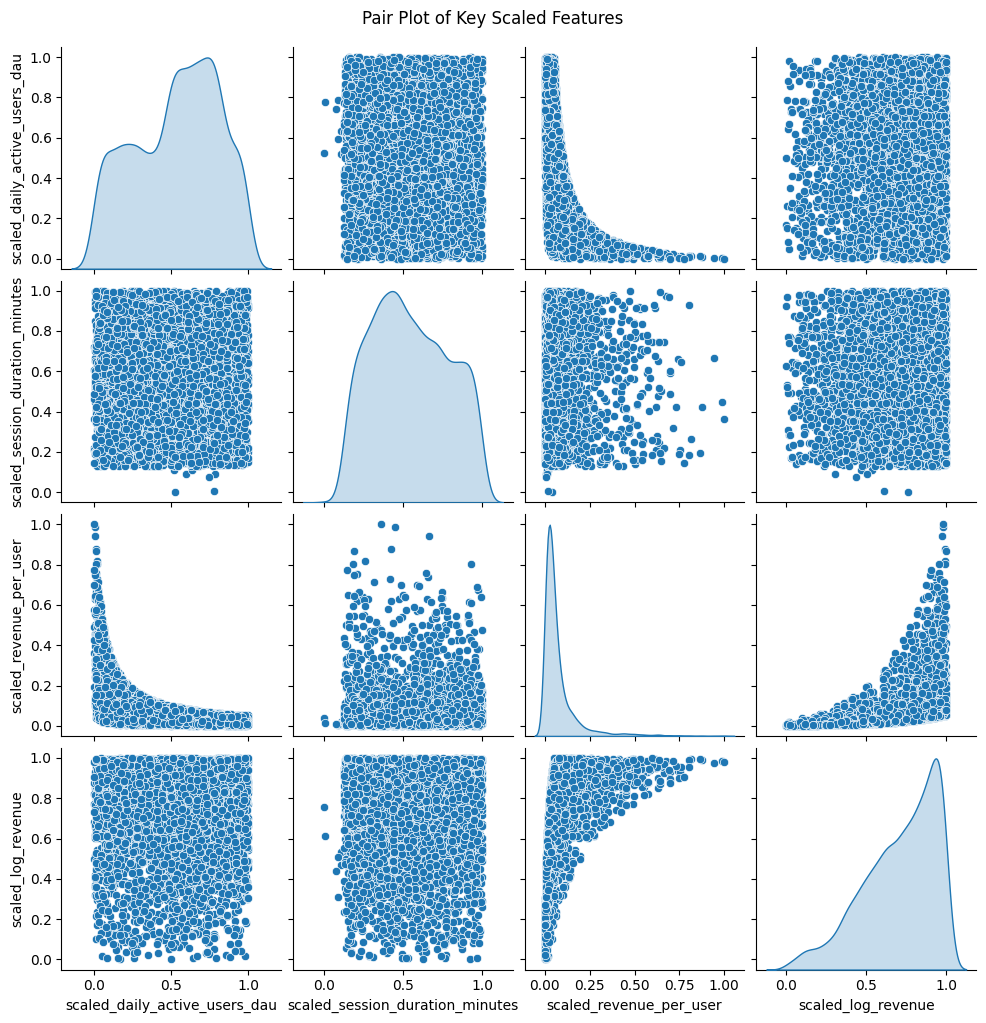

In [13]:
sns.pairplot(df[['scaled_daily_active_users_dau', 'scaled_session_duration_minutes', 'scaled_revenue_per_user', 'scaled_log_revenue']], diag_kind='kde')
plt.suptitle('Pair Plot of Key Scaled Features', y=1.02)
plt.show()

**6B. Platform vs. Genre Revenue Heatmap**

  *   Which genre-platform combos are most profitable?
  *   Supports strategic planning for cross-platform launches


**Key Takeaways from the Plot:**

  * Console + FPS and Console + Simulation lead revenue for the console category, both generating over $73,000.

  * Mobile + Adventure is the top earner overall, with an average revenue of $73,941, suggesting mobile players may engage more deeply with narrative-driven titles.

  * PC + RPG also performs strongly, showing $73,860 in revenue, indicating PC users favor longer-form, immersive genres.

  * VR revenue is more balanced across genres, with a slight edge in Adventure and RPG.

  * **Stakeholder Insights:**
    * Product Managers & Designers: Can prioritize development of high-performing platform-genre pairs (e.g., Adventure games for Mobile or RPG for PC).

    * Marketers: Should tailor campaigns based on what works on each platform. For example, adventure game promotions may perform better on mobile, while PC campaigns should emphasize immersive RPGs.

    * Executives: Might allocate resources to cross-platform hits that show strong performance (e.g., Adventure genre overall).

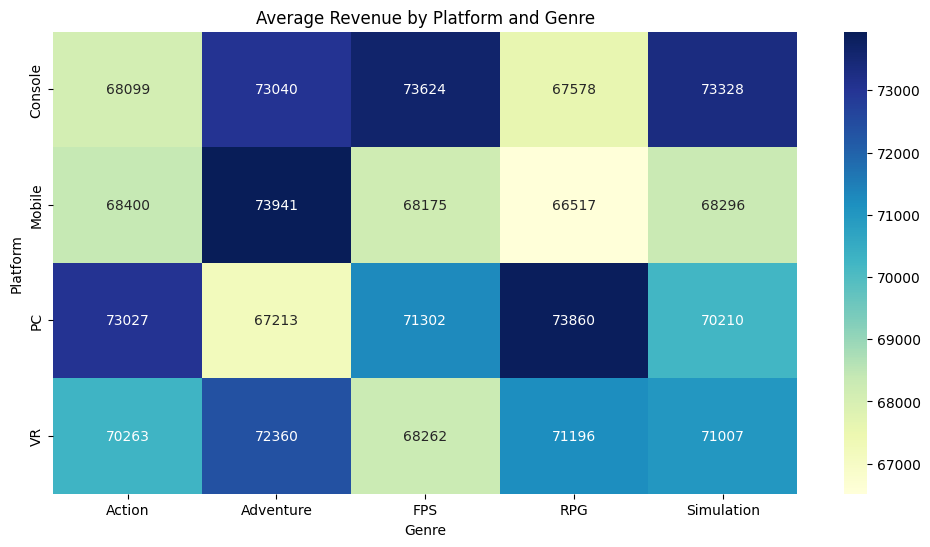

In [14]:
pivot = df.pivot_table(values='revenue_', index='platform', columns='top_genre', aggfunc='mean')
plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap='YlGnBu', annot=True, fmt='.0f')
plt.title('Average Revenue by Platform and Genre')
plt.xlabel('Genre')
plt.ylabel('Platform')
plt.show()